### Problem 1

In [11]:
"""
Isaias Gonzalez, Peoplesoft ID: 2134261, Python Summer Workshop 2023

Problem 1
"""

import random 

def game(n):
    correct_answers = 0
    
    for i in range(n):
        divisor = random.randint(1,9)
        dividend = random.randint(9, 1000)
        # Divide using floor division
        quotient = dividend // divisor
        # Get remainder using modulo
        remainder = dividend % divisor
        print(f"{dividend} / {divisor}")
        user_quotient = input("Enter the Quotient: ")
        user_remainder = input("Enter the Remainder: ")
        if int(user_quotient) == quotient and int(user_remainder) == remainder:
            print("Correct.")
            correct_answers += 1
        else:
            print("Incorrect.")
    print(f"You got {correct_answers} correct answers out of {n}")
    
game(3)

719 / 1


Enter the Quotient:  719
Enter the Remainder:  0


Correct.
209 / 1


Enter the Quotient:  209
Enter the Remainder:  0


Correct.
47 / 8


Enter the Quotient:  5
Enter the Remainder:  5


Incorrect.
You got 2 correct answers out of 3


### Problem 2a & 2b

In [6]:
"""
Isaias Gonzalez, Peoplesoft ID: 2134261, Python Summer Workshop 2023

Problem 2a & 2b
"""

import math
# Single line lambda function for f(x)
f = lambda x: x**2 + 3*x - 7

# Function that will find the slope between two points x=a and x=b on f(x)
def g(a, b):
    slope = (f(b) - f(a)) / (b - a)
    return slope

# Function that will take two points from the function and return the slope, midpoint, and length from the origin to the point
def info(a, b):
    slope = g(a, b)
    midpoint = (a + b) / 2
    length = math.sqrt((b-a)**2 + (f(b) - f(a))**2)
    return slope, midpoint, length

slope_1 = g(4, 13)
print("Slope between x = 4 and x = 13 is:", slope_1)

slope, midpoint, length = info(4, 13)
print("Information about the segment (4, f(4)) to (13, f(13)):")
print("Slope:", slope)
print("Midpoint:", midpoint)
print("Length:", length)

Slope between x = 4 and x = 13 is: 20.0
Information about the segment (4, f(4)) to (13, f(13)):
Slope: 20.0
Midpoint: 8.5
Length: 180.22485955050706


### Problem 3

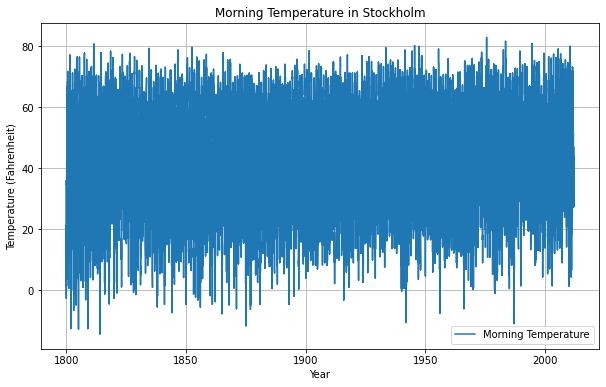

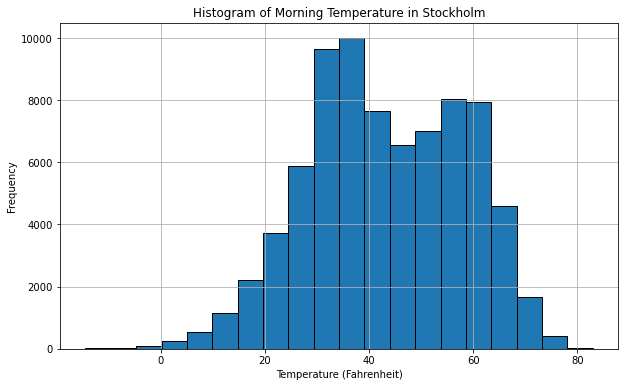

In [6]:
"""
Isaias Gonzalez, Peoplesoft ID: 2134261, Python Summer Workshop 2023

Problem 3
"""

import numpy as np
import matplotlib.pyplot as plt

try:
    # Load the dataset using numpy
    data = np.loadtxt('stockholm_td_adj.dat')
    
    # Extract year, month, day, morning temperature (C), and other columns
    year = data[:, 0].astype(int)
    month = data[:, 1].astype(int)
    day = data[:, 2].astype(int)
    morning_temp_C = data[:, 3]
    
    # Convert Celsius to Fahrenheit
    morning_temp_F = (morning_temp_C * 9/5) + 32
    
    # Generate a series plot of morning temperature vs time
    plt.figure(figsize=(10, 6))
    plt.plot(year + (month - 1) / 12, morning_temp_F, label='Morning Temperature')
    plt.title('Morning Temperature in Stockholm')
    plt.xlabel('Year')
    plt.ylabel('Temperature (Fahrenheit)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Generate a histogram of morning temperature
    plt.figure(figsize=(10, 6))
    plt.hist(morning_temp_F, bins=20, edgecolor='black')
    plt.title('Histogram of Morning Temperature in Stockholm')
    plt.xlabel('Temperature (Fahrenheit)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
except FileNotFoundError:
    print("File 'stockholm_td_adj.dat' not found.")
except Exception as e:
    print("Error occurred:", e)

### Problem 4

In [16]:
"""
Isaias Gonzalez, Peoplesoft ID: 2134261, Python Summer Workshop 2023

Problem 4
"""

import re
from collections import Counter

def find_top_hashtags(file_path, N):
    try:
        with open(file_path, 'r') as file:
            content = file.read()

            # Use regular expression to find hashtags
            hashtags = re.findall(r'#\w+', content)

            # Count the frequency of hashtags using Counter
            hashtag_counts = Counter(hashtags)

            # Sort hashtags based on frequency
            sorted_hashtags = sorted(hashtag_counts.items(), key=lambda x: x[1], reverse=True)

            # Write the top N hashtags to the output file
            with open('top_hashtags.txt', 'w') as output_file:
                for hashtag, count in sorted_hashtags[:N]:
                    output_file.write(f"{hashtag} {count}\n")

            print(f"Top {N} hashtags have been written to 'top_hashtags.txt'")
    except FileNotFoundError:
        print("File not found.")
    except Exception as e:
        print("An error occurred:", e)

# Specify the input file and the number of top hashtags you want
input_file = 'twitter_data.txt'
N = 2

# Call the function to find and write the top hashtags
find_top_hashtags(input_file, N)

Top 2 hashtags have been written to 'top_hashtags.txt'


### Problem 5

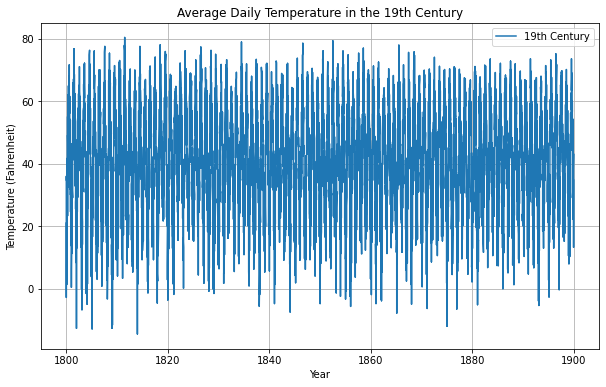

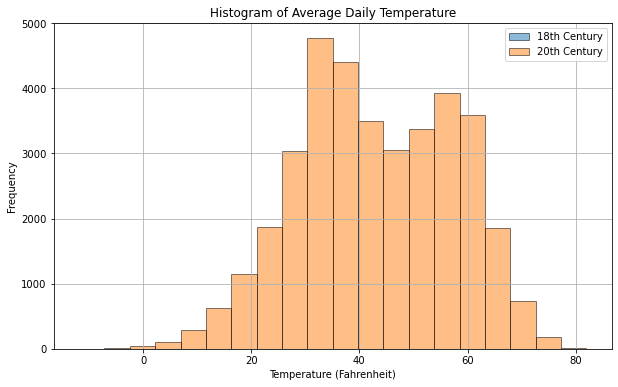

In [17]:
"""
Isaias Gonzalez, Peoplesoft ID: 2134261, Python Summer Workshop 2023

Problem 5
"""

import numpy as np
import matplotlib.pyplot as plt

try:
    # Load the dataset using numpy
    data = np.loadtxt('stockholm_td_adj.dat')
    
    # Extract year, month, day, and temperature columns
    year = data[:, 0].astype(int)
    month = data[:, 1].astype(int)
    day = data[:, 2].astype(int)
    temperatures_C = data[:, 3:6]
    
    # Convert Celsius to Fahrenheit for all temperature readings
    temperatures_F = (temperatures_C * 9/5) + 32
    
    # Calculate the average daily temperature for each row
    average_temp_F = np.mean(temperatures_F, axis=1)
    
    # Create a mask for the 19th century (1800-1899)
    mask_19th_century = (year >= 1800) & (year < 1900)
    
    # Create masks for the 18th century (1700-1799) and 20th century (1900-1999)
    mask_18th_century = (year >= 1700) & (year < 1800)
    mask_20th_century = (year >= 1900) & (year < 2000)
    
    # Extract data for each century
    avg_temp_19th_century = average_temp_F[mask_19th_century]
    avg_temp_18th_century = average_temp_F[mask_18th_century]
    avg_temp_20th_century = average_temp_F[mask_20th_century]
    
    # Generate a series plot of average daily temperature vs time for the 19th century
    plt.figure(figsize=(10, 6))
    plt.plot(year[mask_19th_century] + (month[mask_19th_century] - 1) / 12, avg_temp_19th_century, label='19th Century')
    plt.title('Average Daily Temperature in the 19th Century')
    plt.xlabel('Year')
    plt.ylabel('Temperature (Fahrenheit)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Generate a histogram of average daily temperature for the 18th and 20th century
    plt.figure(figsize=(10, 6))
    plt.hist(avg_temp_18th_century, bins=20, alpha=0.5, label='18th Century', edgecolor='black')
    plt.hist(avg_temp_20th_century, bins=20, alpha=0.5, label='20th Century', edgecolor='black')
    plt.title('Histogram of Average Daily Temperature')
    plt.xlabel('Temperature (Fahrenheit)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Save the separated data sets to disk
    np.savez_compressed('century_data.npz', b=avg_temp_18th_century, a=avg_temp_19th_century, c=avg_temp_20th_century)
    
except FileNotFoundError:
    print("File 'stockholm_td_adj.dat' not found.")
except Exception as e:
    print("An error occurred:", e)
